In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipCodes = gpd.read_file('../data/zipCodes.geojson')
print(zipCodes.crs)
zipCodes.head()
                             
                               

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37221,17,NASHVILLE,241372.31126936738,1266395059.4885921,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
1,37214,6,NASHVILLE,165410.80552042887,674068994.30004752,"MULTIPOLYGON (((-86.65585 36.11824, -86.66410 ..."
2,37204,9,NASHVILLE,93180.292250554368,200664795.51816273,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37015,20,ASHLAND CITY,144497.88069816498,260003984.10646179,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."
4,37232,35,NASHVILLE,9914.0803317846021,2392242.1327489368,"MULTIPOLYGON (((-86.79984 36.14507, -86.80037 ..."


In [3]:
type(zipCodes)

geopandas.geodataframe.GeoDataFrame

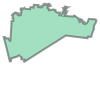

In [4]:
zipCodes.loc[0, 'geometry']

In [5]:
print(zipCodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.970838361174 36.116443241215, -86.970838300132 36.116443152423, -86.97038032496 36.11658624569, -86.97020115443 36.116642227803, -86.969999657155 36.116705210733, -86.969704990951 36.116797311364, -86.968821465628 36.116978031538, -86.96836168311 36.116812498937, -86.968577662342 36.116087712696, -86.968545264778 36.116084032401, -86.968519329437 36.116079855511, -86.96851897803499 36.116079787364, -86.9684972753 36.116075582206, -86.968495429876 36.116075163774, -86.96849362047899 36.116074807437, -86.96847184807901 36.116069806158, -86.968450280288 36.116064172531, -86.968446028595 36.116062924662, -86.96844314765499 36.116062156842, -86.968439501685 36.116061008845, -86.968428926252 36.116057904765, -86.968407507959 36.116050936987, -86.96833531529801 36.116040252106, -86.968262750954 36.116029511788, -86.968171348797 36.116015983181, -86.96810265480801 36.116005815503, -86.96751110189101 36.115918257618, -86.96626834501301 36.115737017315, -86.966250680036 36.11

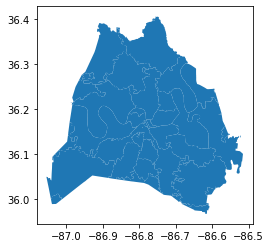

In [6]:
zipCodes.plot();

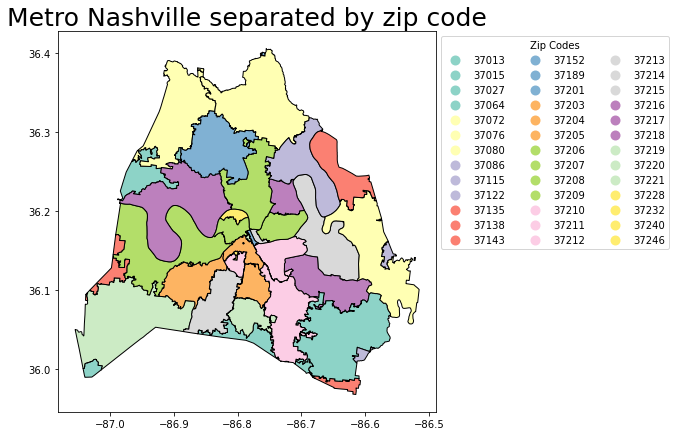

In [7]:
legend = {'title': 'Zip Codes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1), 'ncol': 3}

zipCodes.plot(column = 'zip', figsize=(7, 7),
              edgecolor = 'black',
              legend = True, legend_kwds = legend, 
              cmap = 'Set3')
plt.title('Davidson County separated by Zip Code', fontsize= 25)
plt.show()

In [8]:
historicalMarkers_df = pd.read_csv('../data/Historical_Markers_cleaned.csv')
print(historicalMarkers_df.shape)
historicalMarkers_df.head()

(216, 3)


,Marker Name,Latitude,Longitude
0,Battle of Nashville Stewart's Line,36.086311,-86.791167
1,University School of Nashville,36.143990,-86.798228
2,May-granbery House and Alford Cemetery,36.047802,-86.754991
3,Meharry Medical College,36.166770,-86.805937
4,Madison College,36.250539,-86.683834


In [9]:
historicalMarkers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Marker Name  216 non-null    object 
 1   Latitude     216 non-null    float64
 2   Longitude    216 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.2+ KB


In [10]:
historicalMarkers_df['geometry'] = historicalMarkers_df.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
historicalMarkers_df.head()

,Marker Name,Latitude,Longitude,geometry
0,Battle of Nashville Stewart's Line,36.086311,-86.791167,POINT (-86.791167 36.086311)
1,University School of Nashville,36.143990,-86.798228,POINT (-86.79822799999999 36.14399)
2,May-granbery House and Alford Cemetery,36.047802,-86.754991,POINT (-86.754991 36.047802)
3,Meharry Medical College,36.166770,-86.805937,POINT (-86.805937 36.16677)
4,Madison College,36.250539,-86.683834,POINT (-86.683834 36.250539)


In [11]:
zipCodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
historicalMarkers_geo = gpd.GeoDataFrame(historicalMarkers_df, 
                                         crs = zipCodes.crs, 
                                         geometry = historicalMarkers_df['geometry'])

In [13]:
type(historicalMarkers_geo)

geopandas.geodataframe.GeoDataFrame

In [14]:
zipCodes = zipCodes[['zip', 'po_name', 'geometry']]

In [15]:
histMarkersByZip = gpd.sjoin(historicalMarkers_geo, zipCodes, op = 'within')

In [16]:
histMarkersByZip.head()

,Marker Name,Latitude,Longitude,geometry,index_right,zip,po_name
0,Battle of Nashville Stewart's Line,36.086311,-86.791167,POINT (-86.79117 36.08631),50,37220,NASHVILLE
14,Dry-stack Stone Walls,36.085384,-86.804379,POINT (-86.80438 36.08538),50,37220,NASHVILLE
114,"Battle of Nashville (december 16, 1864) Confed...",36.077687,-86.777135,POINT (-86.77714 36.07769),50,37220,NASHVILLE
145,Crieve Hall,36.065264,-86.757741,POINT (-86.75774 36.06526),50,37220,NASHVILLE
177,Granny White Grave,36.073301,-86.807104,POINT (-86.80710 36.07330),50,37220,NASHVILLE


In [17]:
histMarkersByZip['zip'].value_counts()

37203    42
37212    15
37208    14
37209    12
37205    11
37201    11
37206    11
37210    10
37221     8
37215     8
37204     7
37211     7
37217     6
37214     6
37013     6
37218     5
37220     5
37207     5
37115     4
37219     4
37138     4
37228     3
37076     3
37216     2
37213     2
37080     1
37027     1
37072     1
37189     1
Name: zip, dtype: int64

In [18]:
histMarkersIn37203 = histMarkersByZip.loc[histMarkersByZip['zip'] == '37203']
histMarkersIn37203.shape

(42, 7)

In [19]:
polygon37203 = zipCodes.loc[zipCodes['zip'] == '37203']
polygon37203.shape

(1, 3)

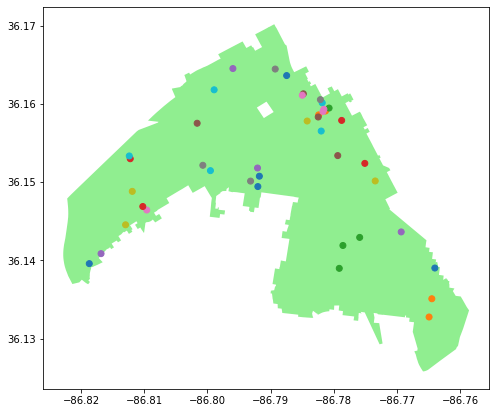

In [20]:
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
histMarkersIn37203.plot( ax = ax, column = 'Marker Name');
plt.show();

In [21]:
polygon37203.geometry.centroid

C:\Users\jrtho\AppData\Local\Temp\ipykernel_11060\651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


39    POINT (-86.78898 36.14857)
dtype: geometry

In [22]:
center = polygon37203.geometry.centroid[39]
print(center)

POINT (-86.7889841001608 36.14857447556778)


C:\Users\jrtho\AppData\Local\Temp\ipykernel_11060\3697161888.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[39]


In [23]:
areaCenter = [center.y, center.x]
print(areaCenter)

[36.148574475567784, -86.7889841001608]


In [24]:
mapFor37203 = folium.Map(location = areaCenter, zoom_start = 12)
mapFor37203

In [25]:
i = 0
for row_index, row_values in histMarkersIn37203.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 20
values are:
 
Marker Name    Nashville Porter and Ale Brewery
Latitude                              36.157522
Longitude                            -86.801631
geometry           POINT (-86.801631 36.157522)
index_right                                  39
zip                                       37203
po_name                               NASHVILLE
Name: 20, dtype: object
------------------------- 
index is 21
values are:
 
Marker Name                 Bradley Studios
Latitude                          36.149432
Longitude                        -86.792024
geometry       POINT (-86.792024 36.149432)
index_right                              39
zip                                   37203
po_name                           NASHVILLE
Name: 21, dtype: object
------------------------- 
index is 35
values are:
 
Marker Name               May Hosiery Mills
Latitude                          36.143634
Longitude                        -86.769339
geometry       POINT (-86.769339 36.143634)


In [26]:
mapFor37203 = folium.Map(location =  areaCenter, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(mapFor37203)

for row_index, row_values in histMarkersIn37203.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Marker Name'])
    icon=folium.Icon(color='blue',icon='building', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(mapFor37203)
mapFor37203.save('../maps/mapFor37203.html')
#Display map
mapFor37203

In [27]:
folium.Map?

In [28]:
clusterMap37203 = folium.Map(location =  areaCenter, zoom_start = 12)

markerCluster37203 = MarkerCluster().add_to(clusterMap37203)

folium.GeoJson(polygon37203).add_to(clusterMap37203)

for row_index, row_values in histMarkersIn37203.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Marker Name'])
    icon=folium.Icon(color="blue",icon="building", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(markerCluster37203)


clusterMap37203.save('../maps/cluster37203.html')

#Display map
clusterMap37203

In [29]:
mapFor37203 = folium.Map(location =  areaCenter, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(mapFor37203)

locations = histMarkersIn37203[['Latitude', 'Longitude']].values.tolist()
mapFor37203.add_child(
    FastMarkerCluster(locations)
)



#Display map
mapFor37203